# Effects of different factors on loans' interest rate and outcome (paid back or not)
## by Estitxu Larralde Erasun


## Investigation Overview

I'd like to look into the correlation of different variables as loan original amount and the interest rate of the loan and the final outcome: was the loan paid back or not (loan status)?

I'm also interested by the correlation of these two variables among them: loan status and borrower APR (annual interest rate) as well as their correlation with the employment status of the borrowers.



## Dataset Overview

The dataset included data on 114 000 small loans from the peer-to-peer lending company Prosper. There were 81 variables on each loan.

After cleaning the dataset of duplicates, null values and irrelevant rows and simplifiying some categorical data, the dataset had around 48000 entries, with 11 variables for each of them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan= pd.read_csv('prosperLoanData.csv', engine='python')

In [3]:
#I create a copy of the dataset before any wrangling
loan_1=loan.copy()

In [4]:
#I filter only the variables I'm going to work with
loan_1=loan_1[['ListingNumber','LoanStatus', 'BorrowerAPR','EmploymentStatus','StatedMonthlyIncome','LoanOriginalAmount']]

In [5]:
#dropping 'Current' status
loan_1=loan_1[loan_1['LoanStatus']!='Current' ]

In [6]:
#dropping 'Cancelled' status
loan_1=loan_1[loan_1['LoanStatus']!='Cancelled' ]

In [7]:
#I drop null values
loan_1=loan_1.dropna()

In [8]:
#I drop 25 duplicated rows
loan_1=loan_1.drop_duplicates()

In [9]:
# Modifying data format when necessary
loan_1.astype({'ListingNumber': 'str', 'StatedMonthlyIncome':'int'}).dtypes

ListingNumber           object
LoanStatus              object
BorrowerAPR            float64
EmploymentStatus        object
StatedMonthlyIncome      int64
LoanOriginalAmount       int64
dtype: object

In [10]:
# Grouping EmploymentStatus categories into 'Employed' 
loan_1=loan_1.replace(['Full-time','Self-employed','Part-time'], 'Employed')

In [11]:
#Replacing LoanStatus values and grouping them into 'Succesful' (paid off) and 'Unsuccesful' (not paid back to lender).
loan_2=loan_1.replace(['Defaulted', 'Chargedoff','Past Due (>120 days)'], 'Unsuccessful')
loan_2=loan_2.replace(['FinalPaymentInProgress', 'Completed'], 'Successful')
values=['Successful','Unsuccessful']
loan_3= loan_2.loc[loan_2['LoanStatus'].isin(values)]

In [12]:
# convert LoanStatus and EmploymentStatus into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Unsuccessful', 'Successful'], 
                    'EmploymentStatus':['Other', 'Not employed','Retired','Employed']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_3[var] = loan_3[var].astype(ordered_var)
    
    

## Loan Status distribution

Most of the loans in the sample are succesful (ie have been paid back to the lender(s)). Nevertheless, the quantity of unsuccesful loans is very significant: around 28% of the loans.


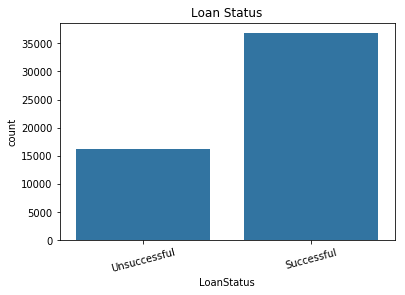

In [13]:
base_color= sb.color_palette()[0]
sb.countplot(data=loan_3, x='LoanStatus', color=base_color)
plt.title('Loan Status')
plt.xticks(rotation=15);

## Borrower APR distribution

The annual percentage rate of the borrowers or annual interest rate's histogram shows a multimodal distribution, with interest rates between 0.6% and 42%, with a high peak at 35.5-36% of interest rate.

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

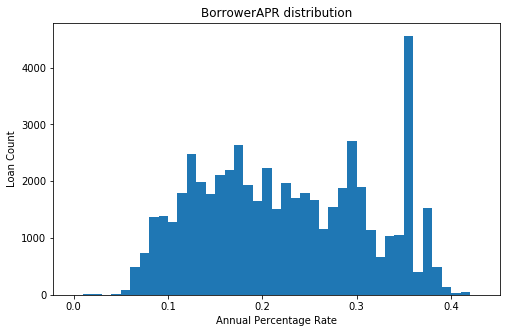

In [14]:
binsize = 0.01
bins = np.arange(0, loan_1['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_1, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Annual Percentage Rate')
plt.ylabel('Loan Count')
plt.title ('BorrowerAPR distribution')
plt.show()

## Loan Status vs. BorrowerAPR

As it can be observed in the violinplot below, the BorrowerAPR is in average lower for Successful loans. We can also observe a concentration of high interest rates on the upper side of the figure of unsuccesful loans, more precisely around 30% and 36% of interest rate.
Succesful loans' interest rate concentrates around 12%.

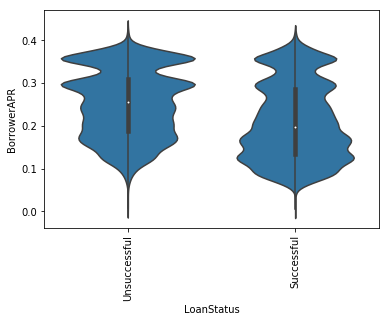

In [15]:
base_color=sb.color_palette()[0]
sb.violinplot(data=loan_3, x='LoanStatus', y='BorrowerAPR', 
              color=base_color)
plt.xticks(rotation=90);

## Loan Status vs. Employment Status

As we can see below there is a clear correlation between the employment status and the loan status: borrowers whose Employment Status was Employed, 70% successfuly paid the loan, 30% didn't.  
As the employment status of the borrowers worsens, the proportion of succesful loans does, too. 

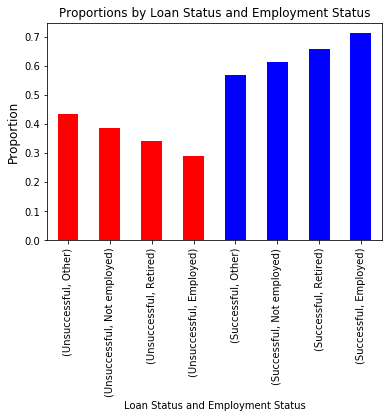

In [16]:
counts=loan_3.groupby(['LoanStatus','EmploymentStatus']).count()['BorrowerAPR']
totals=loan_3.groupby('EmploymentStatus').count()['BorrowerAPR']
proportions=counts/totals

my_colors = ['red','red','red','red','blue','blue','blue','blue']
proportions.plot(kind='bar', title="Proportions by Loan Status and Employment Status", color=my_colors)
plt.xlabel('Loan Status and Employment Status')

plt.ylabel('Proportion', fontsize=12);

## Borrower APR vs. Employment Status

The average interest rate for Not Employed and Other categories of Employment Status are higher than those of the Retired and Employed borrowers. Besides, we can observe a high concentration of the highest interest rate on the top of the violin figure that represents the group Other and to a lesser extent on the figure for Not Employed borrowers.


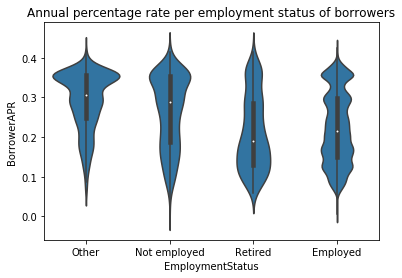

In [17]:
base_color=sb.color_palette()[0]

sb.violinplot(data=loan_3, x='EmploymentStatus', y='BorrowerAPR', size=8,
              color=base_color)
plt.xticks()
plt.title('Annual percentage rate per employment status of borrowers');

## BorrowerAPR vs. EmploymentStatus vs. LoanStatus

Besides confirming the correlation between these three variables, we can see that succesful loans for the unemployed and 'other' employment status borrowers got a similar average interest rate than unsuccesful loans of employed and retired borrowers. In other words, the employment status of borrowers seem to factor quite heavily in the interest rate granted for the loans.

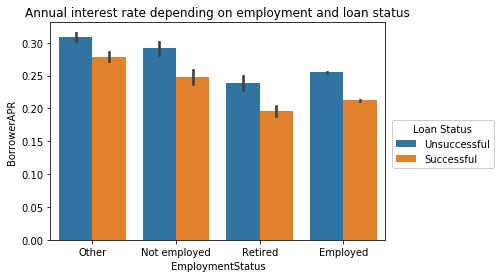

In [27]:
ax= sb.barplot(data=loan_3, x='EmploymentStatus', y='BorrowerAPR', 
               hue='LoanStatus')
ax.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0, framealpha=1, title='Loan Status')
plt.title('Annual interest rate depending on employment and loan status');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Prosper_loan.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_loan.ipynb to slides
[NbConvertApp] Writing 411671 bytes to Part_II_Prosper_loan.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Prosper_loan.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser